# Project : 3D House (Flanders)

## For given address in Flanders need to plot the 3D House/building

### Given the DSM, DTM tif files for flanders splitted in smaller tif zipped and stored on url

DSM : http://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m

DTM:http://www.geopunt.be/download?container=dhm-vlaanderen-ii-dtm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DTM,%20raster,%201m


# Importing the packages required

In [184]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import requests
import json
import fiona
import pandas as pd
import geopy
import pyproj
import shapely
import osr
import rasterio as rio
import gdal
import os
#import pygis
#import richdem as rd
#import earthpy as et
%matplotlib inline

# 1. Checking for a single tif file

In [9]:
dsmfile = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif' #DSM
dtmfile = 'D:/BeCode/Maps/DTM_DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif' #DTM

## Getting Raster Metadata


In [10]:
dsm = gdal.Open(dsmfile)
dtm = gdal.Open(dtmfile)
print (dsm.GetMetadata())
print (dtm.GetMetadata())

{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}
{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}


In [11]:
print(dsm.RasterCount)
print(dtm.RasterCount)

1
1


In [12]:
print(dsm.GetDescription())
print(dtm.GetDescription())

D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif
D:/BeCode/Maps/DTM_DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif


In [13]:
print(dsm.RasterXSize,dsm.RasterYSize )
print(dtm.RasterXSize,dtm.RasterYSize )

17000 9000
17000 9000


In [7]:
print(dsm.GetProjection())

PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.36748666666667],PARAMETER["standard_parallel_1",51.1666672333333],PARAMETER["standard_parallel_2",49.8333339],PARAMETER["false_easting",150000.013],PARAMETER["false_northing",5400088.438],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","31370"]]


In [14]:
dsm = gdal.Open(dsmfile)
dtm = gdal.Open(dtmfile)
print (dsm.GetMetadata())
print (dtm.GetMetadata())

{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}
{'AREA_OR_POINT': 'Area', 'VERTICAL_SRS': 'EPSG:5110'}


In [15]:
print(dsm.GetDescription())
print(dtm.GetDescription())

D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif
D:/BeCode/Maps/DTM_DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif


In [16]:
print(dsm.RasterCount)
print(dtm.RasterCount)

1
1


In [17]:
print(dsm.RasterXSize,dsm.RasterYSize )
print(dtm.RasterXSize,dtm.RasterYSize )

17000 9000
17000 9000


In [18]:
print(dsm.GetGeoTransform())
print(dtm.GetGeoTransform())

(145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)
(145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)


In [19]:
print("Number of Layer or Raster bands for DSM file", dsm.RasterCount)
print("Number of Layer or Raster bands for DTM file", dtm.RasterCount)


Number of Layer or Raster bands for DSM file 1
Number of Layer or Raster bands for DTM file 1


## Raster Band Info

In [26]:
banddsm = dsm.GetRasterBand(1)
banddtm = dtm.GetRasterBand(1)

In [27]:
print("No Data Value for DSM : ", banddsm.GetNoDataValue())
print("No Data Value for DTM : ", banddsm.GetNoDataValue())

No Data Value for DSM :  -9999.0
No Data Value for DTM :  -9999.0


In [28]:
# For DSM File

print("Min Data Value for DSM band : ", banddsm.GetMinimum())
print("Max Data Value for DSM band: ", banddsm.GetMaximum())
print("Band unit type for DSM band :", banddsm. GetUnitType())

Min Data Value for DSM band :  -3.25
Max Data Value for DSM band:  98.559997558594
Band unit type for DSM band : 


In [29]:
# For DTM File

print("Min Data Value for DTM band : ", banddtm.GetMinimum())
print("Max Data Value for DTM band : ", banddtm.GetMaximum())
print("Band unit type for DTM band", banddtm. GetUnitType())

Min Data Value for DTM band :  3.1400001049042
Max Data Value for DTM band :  33.270000457764
Band unit type for DTM band 


In [30]:
print("band x size for DSM band", banddsm.XSize)
print("band y size for DSM band",banddsm.YSize)
print("band type for DSM band", banddsm.DataType)

band x size for DSM band 17000
band y size for DSM band 9000
band type for DSM band 6


In [31]:
print("band x size for DTM band", banddtm.XSize)
print("band y size for DTM band",banddtm.YSize)
print("band type for DTM band", banddtm.DataType)

band x size for DTM band 17000
band y size for DTM band 9000
band type for DTM band 6


## Visualizing the geotif file

In [34]:
#Importing the tif file

import richdem as rd
dsm = rd.LoadGDAL(dsmfile)
dtm = rd.LoadGDAL(dtmfile)

print(dsm)
print(dtm)

[[-9.999e+03 -9.999e+03 -9.999e+03 ...  1.275e+01  1.279e+01  1.280e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.280e+01  1.281e+01  1.284e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.284e+01  1.283e+01  1.288e+01]
 ...
 [ 4.520e+00  4.550e+00  4.570e+00 ...  1.680e+01  1.693e+01  1.690e+01]
 [ 4.490e+00  4.570e+00  4.580e+00 ...  1.691e+01  1.691e+01  1.695e+01]
 [ 4.480e+00  4.550e+00  4.570e+00 ...  1.687e+01  1.688e+01  1.691e+01]]
[[-9.999e+03 -9.999e+03 -9.999e+03 ...  1.275e+01  1.279e+01  1.280e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.280e+01  1.281e+01  1.284e+01]
 [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.284e+01  1.283e+01  1.288e+01]
 ...
 [ 4.520e+00  4.550e+00  4.570e+00 ...  1.680e+01  1.693e+01  1.690e+01]
 [ 4.490e+00  4.570e+00  4.580e+00 ...  1.691e+01  1.691e+01  1.693e+01]
 [ 4.480e+00  4.550e+00  4.570e+00 ...  1.686e+01  1.688e+01  1.690e+01]]


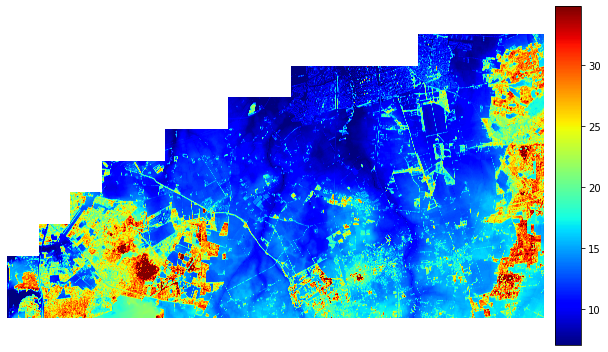

In [35]:
#For reference the 1st DSM appears as follows

dsmfig = rd.rdShow(dsm, ignore_colours=[0], axes=False, cmap='jet', figsize=(9,5))

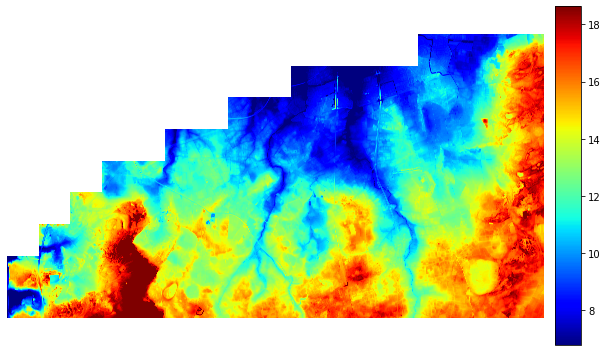

In [36]:
#For reference the 1st DTM appears as follows

dtmfig = rd.rdShow(dtm, ignore_colours=[0], axes=False, cmap='jet', figsize=(9,5))

## Complete Filling

### Depression-filling is often used to fill in all the depressions in a DEM to the level of their lowest outlet or spill-point

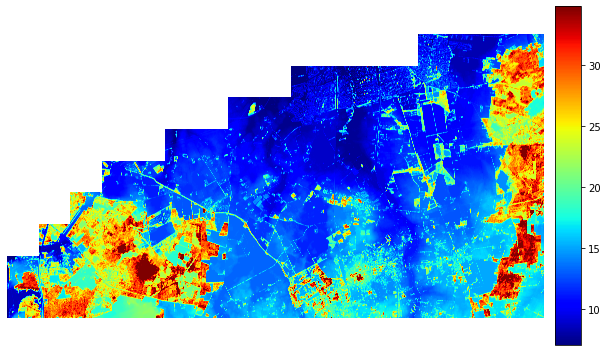

In [38]:
dsm_fill = rd.FillDepressions(dsm, in_place=False)
dsm_fillfig = rd.rdShow(dsm_fill, ignore_colours=[0], axes=False, cmap='jet', vmin=dsmfig['vmin'], vmax=dsmfig['vmax'], figsize=(9,5))

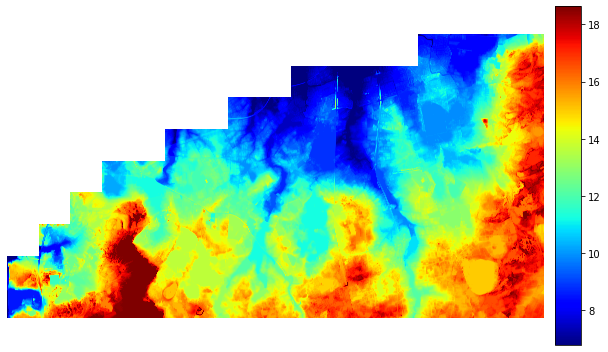

In [39]:
dtm_fill = rd.FillDepressions(dtm, in_place=False)
dtm_fillfig = rd.rdShow(dtm_fill, ignore_colours=[0], axes=False, cmap='jet', vmin=dtmfig['vmin'], vmax=dtmfig['vmax'], figsize=(9,5))

## The difference between the DSM-DTM

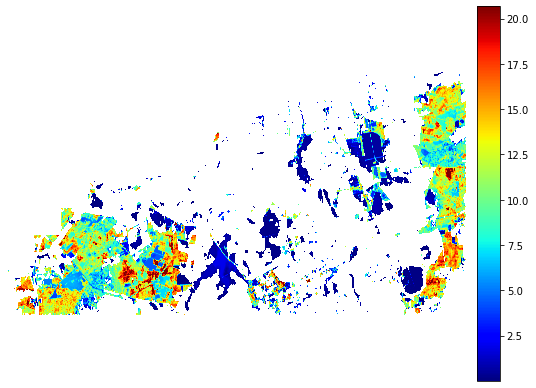

In [40]:
dsmdtmfill_diff = dsm_fill - dtm_fill
dsmdtmfill_diff_fig = rd.rdShow(dsmdtmfill_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

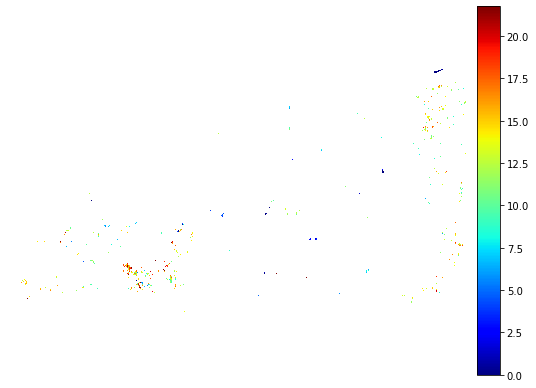

In [42]:
dsmdtm_diff = dsm - dtm
dsmdtm_difffig = rd.rdShow(dsmdtm_diff, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,5.5))

## 2. Loading multiple zip files from url and extract metadata for tif  (Need to work on)

In [108]:
import zipfile
import requests

In [109]:
downloadurl = 'http://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m'

In [110]:
req = requests.get(downloadurl)

In [111]:
req.headers

{'Cache-Control': 'private', 'Content-Type': 'text/html; charset=utf-8', 'Content-Encoding': 'gzip', 'Last-Modified': 'Wed, 20 Nov 2013 15:03:37 GMT', 'Vary': 'Accept-Encoding', 'Server': 'Microsoft-IIS/8.5', 'Set-Cookie': 'ASP.NET_SessionId=lpq4a4yc3oqo3qyxztybt3yz; path=/; HttpOnly, geopunt_language=nl; expires=Fri, 31-Dec-9999 23:59:59 GMT; path=/', 'X-UA-Compatible': 'IE=edge', 'Date': 'Thu, 09 Jul 2020 21:05:35 GMT', 'Content-Length': '19605'}

In [112]:
req.url

'http://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m'

In [113]:
with open ('finename', 'wb') as f: #filename is given the name for dowloaded file
    f.write(req.content)

In [115]:
filepath = ''     #filename is given the name for dowloaded file using rio
with rio.open(dsmfile) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_dict(init='epsg:31370'), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


#  3. Coding

# Work Flow

In [76]:
# 1 Get the address from the user
# 2 Extract lat_lon from address by using lam_lat_lon function
# 3 For all the zipped tif DTM & DSM on url form df of metadata.
# 4 Form a df for all tiled tif files using tif_metadata function
# 5 Find the tile in which the given co-oridinate is present
# 6 plot the tile, shm, polygon 
# 7 3D of the location

# Sample Address:  Molenstraat 52, 2861 Sint-Katelijne-Waver


In [77]:
address = input("Enter the Address")
print("The entered address is \n",address) 

Enter the AddressMolenstraat 52, 2861 Sint-Katelijne-Waver
The entered address is 
 Molenstraat 52, 2861 Sint-Katelijne-Waver


In [179]:
# Getting the lambert co-ordinates for a given location

def lam_lat_lon(address):
    req = requests.get(f"http://loc.geopunt.be/geolocation/location?q={address}&c=1",)
    x = req.json()["LocationResult"][0]["Location"]["X_Lambert72"]
    y = req.json()["LocationResult"][0]["Location"]["Y_Lambert72"]
    return x, y

given_loc = lam_lat_lon(address)
print(given_loc)



(165312.83, 194824.78)
(165312.83, 194824.78)


In [74]:
# Defination for storing all the information about tile.

from osgeo import gdal

def tif_metadata(infile):
    
    ds = gdal.Open(infile)  #'path/to/file'
    my_file = rio.open(infile)
    
    width = ds.RasterXSize
    height = ds.RasterYSize
    gt = ds.GetGeoTransform()
    minx = gt[0]
    miny = gt[3] + width*gt[4] + height*gt[5] 
    maxx = gt[0] + width*gt[1] + height*gt[2]
    maxy = gt[3] 
    
    center = my_file.xy((my_file.height // 2), (my_file.width // 2))
    
   
    return [width, height, gt, minx, miny, maxx, maxy, center]

tiffinfo = tif_metadata(dsmfile)

print(tiffinfo)

width = tiffinfo[0]
print('width', width)
height = tiffinfo[1]
print('height', height)
gt = tiffinfo[2]
print('gt', gt)
minx = tiffinfo[3]
print('minx', minx)
miny = tiffinfo[4]
print('miny', miny)
maxx = tiffinfo[5]
print('maxx', maxx)
maxy = tiffinfo[6]
print('maxy', maxy)
print("Center of tiff", tiffinfo[7])


[17000, 9000, (145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0), 145000.0, 238000.0, 162000.0, 247000.0, (153500.5, 242499.5)]
width 17000
height 9000
gt (145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0)
minx 145000.0
miny 238000.0
maxx 162000.0
maxy 247000.0
Center of tiff (153500.5, 242499.5)


## Splitting raster into smaller chunks using GDAL

In [149]:
import os, gdal

in_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/'
input_filename = 'DHMVIIDSMRAS1m_k01.tif'

out_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/Tiled_output/'
output_filename = ''


tile_size_x = 2000
tile_size_y = 2000

ds = gdal.Open(in_path + input_filename)
band = ds.GetRasterBand(1)
xsize = band.XSize   # 1700 * 9000
ysize = band.YSize

gt = ds.GetGeoTransform()
minx = gt[0]
maxy = gt[3]


for i in range(0, xsize, tile_size_x):     
    for j in range(0, ysize, tile_size_y):        
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + "_namestart_" + str(gt[0]-i) + "_" + str(gt[3]-j) + ".tif"
        os.system(com_string)


In [168]:
import os

out_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/Tiled_output/'

files = os.listdir(out_path)
namelist =[]
for f in files:    
    namelist.append(f)
    
df = pd.DataFrame(namelist)
df[['1','2','3','x_corner','y_corner']] = df[0].str.split('_',expand=True)
df['y_corner'] = df['y_corner'].str.replace('.tif','')
df['x_corner'] = pd.to_numeric(df['x_corner'], errors='ignore') #Str to int
df['y_corner'] = pd.to_numeric(df['y_corner'], errors='ignore') #Str to int

df['y_center'] = df['y_corner'] - (tile_size_y/2)
df['x_center'] = df['x_corner'] + (tile_size_x/2)
df.head()

,0,1,2,3,x_corner,y_corner,y_center,x_center
0,0_0_namestart_145000.0_247000.0.tif,0,0,namestart,145000.0,247000.0,246000.0,146000.0
1,0_2000_namestart_145000.0_245000.0.tif,0,2000,namestart,145000.0,245000.0,244000.0,146000.0
2,0_4000_namestart_145000.0_243000.0.tif,0,4000,namestart,145000.0,243000.0,242000.0,146000.0
3,0_6000_namestart_145000.0_241000.0.tif,0,6000,namestart,145000.0,241000.0,240000.0,146000.0
4,0_8000_namestart_145000.0_239000.0.tif,0,8000,namestart,145000.0,239000.0,238000.0,146000.0


In [173]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x_center, df.y_center))
print(gdf.head())

                                        0  1     2          3  x_corner  \
0     0_0_namestart_145000.0_247000.0.tif  0     0  namestart  145000.0   
1  0_2000_namestart_145000.0_245000.0.tif  0  2000  namestart  145000.0   
2  0_4000_namestart_145000.0_243000.0.tif  0  4000  namestart  145000.0   
3  0_6000_namestart_145000.0_241000.0.tif  0  6000  namestart  145000.0   
4  0_8000_namestart_145000.0_239000.0.tif  0  8000  namestart  145000.0   

   y_corner  y_center  x_center                       geometry  
0  247000.0  246000.0  146000.0  POINT (146000.000 246000.000)  
1  245000.0  244000.0  146000.0  POINT (146000.000 244000.000)  
2  243000.0  242000.0  146000.0  POINT (146000.000 242000.000)  
3  241000.0  240000.0  146000.0  POINT (146000.000 240000.000)  
4  239000.0  238000.0  146000.0  POINT (146000.000 238000.000)  


In [175]:
# Nearest tile center from geo data frame

from shapely.ops import nearest_points     

pts = gdf['geometry']
pts =  pts.unary_union # convert to Shapely MultiPoint geometry
pt = Point(134345, 232033)

[o.wkt for o in nearest_points(pt, pts)]


['POINT (134345 232033)', 'POINT (134000 238000)']

In [182]:
import os
import matplotlib.pyplot as plt
import seaborn as sns   # Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio   # Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep

sns.set(font_scale=1.5, style="white") # Prettier plotting with seaborn

In [70]:



raster_info = geo.get_geo_info(dsmfile, band=1)
print(raster_info)

ModuleNotFoundError: No module named 'georasters'

In [336]:
import geopy
from geopy.geocoders import Nominatim

gc = Nominatim(user_agent="fintu-blog-geocoding-python")
gc.geocode("belgielei, 33, antwerpen")

Location(33, Belgiëlei, Haringrode, Antwerpen, Vlaanderen, 2018, België - Belgique - Belgien, (51.20781115, 4.421477456143639, 0.0))

In [307]:
gc.reverse("52.509669, 13.376294")

Location(Potsdamer Platz, Bellevuestraße, Botschaftsviertel, Tiergarten, Mitte, Berlin, 10785, Deutschland, (52.5098014, 13.375589791291057, 0.0))

In [131]:
geolocator = Nominatim(user_agent="fintu-blog-geocoding-python")
location = geolocator.reverse("51.207833, 4.421348")
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

35, Belgiëlei, Haringrode, Antwerpen, Vlaanderen, 2018, België - Belgique - Belgien
(51.2077843, 4.421389717954431)
{'place_id': 193520022, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 502137949, 'lat': '51.2077843', 'lon': '4.421389717954431', 'display_name': '35, Belgiëlei, Haringrode, Antwerpen, Vlaanderen, 2018, België - Belgique - Belgien', 'address': {'house_number': '35', 'road': 'Belgiëlei', 'neighbourhood': 'Haringrode', 'city_district': 'Antwerpen', 'city': 'Antwerpen', 'county': 'Antwerpen', 'state': 'Vlaanderen', 'postcode': '2018', 'country': 'België - Belgique - Belgien', 'country_code': 'be'}, 'boundingbox': ['51.207708', '51.207853', '4.4212723', '4.4215089']}


In [334]:
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"
        os.system(com_string)

# Addon Extra Code may require in future

In [ ]:
# If more than one band available in tiff file


src_ds = gdal.Open(dsmfile)
if src_ds is None:
    print ('Unable to open', dsm)
    sys.exit(1)

print ("[ RASTER BAND COUNT ]: ", src_ds.RasterCount)
for band in range( src_ds.RasterCount ):
    band += 1
    print ("[ GETTING BAND ]: ", band)
    srcband = src_ds.GetRasterBand(band)
    if srcband is None:
        continue

    stats = srcband.GetStatistics( True, True )
    if stats is None:
        continue

    print ("[ STATS ] =  Minimum=%.3f, Maximum=%.3f, Mean=%.3f, StdDev=%.3f" % ( \
                stats[0], stats[1], stats[2], stats[3] ))

In [78]:
from osgeo import osr, gdal

# get the existing coordinate system
ds = gdal.Open(dsmfile)
old_cs= osr.SpatialReference()
old_cs.ImportFromWkt(ds.GetProjectionRef())

# create the new coordinate system
wgs84_wkt = """
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.01745329251994328,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]"""
new_cs = osr.SpatialReference()
new_cs .ImportFromWkt(wgs84_wkt)

# create a transform object to convert between coordinate systems
transform = osr.CoordinateTransformation(old_cs,new_cs) 

#get the point to transform, pixel (0,0) in this case
width = ds.RasterXSize
height = ds.RasterYSize
gt = ds.GetGeoTransform()
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 

#get the coordinates in lat long
latlong = transform.TransformPoint(x,y) 

In [134]:
from ipyleaflet import Map
m = Map(center=(52.204793, 360.121558),zoom=4, scroll_wheel_zoom=True)

In [ ]:
#Python PIL For Loop to work with Multi-image TIFF


from PIL import Image
import numpy as np

def read_tiff(path):
    """
    path - Path to the multipage-tiff file
    """
    img = Image.open(path)
    images = []
    for i in range(img.n_frames):
        img.seek(i)
        images.append(np.array(img))
    return np.array(images)

In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "my_python_files.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

original tif meta data: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_dict(init='epsg:31370'), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}
original tif bounds: BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)


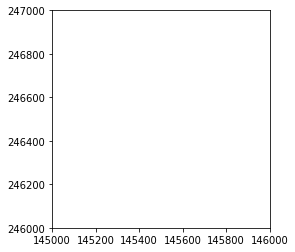

cropped tif meta data: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 1000, 'height': 1000, 'count': 1, 'crs': CRS.from_dict(init='epsg:31370'), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}
cropped tif bounds: BoundingBox(left=145000.0, bottom=246000.0, right=146000.0, top=247000.0)


In [93]:
# numpy for arrays
import numpy as np
# rasterio for tif access
import rasterio as rio


# tif path
k15_path = dsmfile
# open and store tif
k15_tif = rio.open(k15_path)
# pixel data from tif
k15_data = np.array(k15_tif.read(1))
# file data tif
k15_meta = k15_tif.meta
print(f"original tif meta data: {k15_meta}")
# lamber72 box of tif
k15_bounds = k15_tif.bounds
print(f"original tif bounds: {k15_bounds}")
# crop a 1000x1000 square out of the array
k15_arr = k15_data[:1000,:1000]

# if you don't change width and height
# the cut will be same size as original tif
crop_width = k15_meta["width"] = 1000
crop_height = k15_meta["height"] = 1000
# transform needs to be edited so the crop has correct coords
k15_meta["transform"] = from_bounds(
    k15_bounds.left,              # new left-most coord
    k15_bounds.top - crop_height, # new bottom-most coord
    k15_bounds.left + crop_width, # new right-most coord
    k15_bounds.top,               # new top-most coord
    crop_width, crop_height)      # correct width & height

# open a new file in write mode as destination
# **meta is the **kwargs passed to the tif
with rio.open("./cut.tif", "w", **k15_meta) as destination:
    # write the pixel data with the **meta data
    destination.write(k15_arr, indexes=1)
# open the cropped tif we wrote
crop = rio.open("./cut.tif")
# plot the cropped tif
show(crop)
# print the cropped meta data
print(f"cropped tif meta data: {crop.meta}")
# print the cropped bounds
print(f"cropped tif bounds: {crop.bounds}")

In [126]:
import os, gdal

in_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF'
input_filename = 'DHMVIIDSMRAS1m_k01.tif'

out_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF'
output_filename = 'tile_'

tile_size_x = 1000
tile_size_y = 1000

ds = gdal.Open(in_path + input_filename)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize

for i in range(0, xsize, tile_size_x):
    for j in range(0, ysize, tile_size_y):
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"
        os.system(com_string)

RuntimeError: D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFFDHMVIIDSMRAS1m_k01.tif: No such file or directory

In [138]:
 gdal_retile.py targetDir D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF  dsmfile

SyntaxError: invalid syntax (<ipython-input-138-83816a1a9aa9>, line 1)

In [139]:
import os, gdal

in_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF'
input_filename = 'DHMVIIDSMRAS1m_k01.tif'

out_path = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF'
output_filename = 'tile_'

tile_size_x = 1000
tile_size_y = 1000

ds = gdal.Open(dsmfile)
band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize

for i in range(0, xsize, tile_size_x):
    for j in range(0, ysize, tile_size_y):
        com_string = "gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " + str(in_path) + str(input_filename) + " " + str(out_path) + str(output_filename) + str(i) + "_" + str(j) + ".tif"
        os.system(com_string)

In [159]:
import Polygon
import numpy as np
import shapefile
import gdal
import sys
import yaml

def snap_to_grid(geotransform, lat, lon):
  '''lat/lon to nearest grid point (x,y)'''
  x = (lon - geotransform['top_left_x']) / geotransform['pixel_width']
  y = (lat - geotransform['top_left_y']) / geotransform['pixel_height']
  return (int(round(x)),int(round(y)))

def grid_to_center_latlon(geotransform, x, y):
  '''(x,y) to latlon'''
  lon = geotransform['top_left_x'] + geotransform['pixel_width']*(x+.5)
  lat = geotransform['top_left_y'] + geotransform['pixel_height']*(y+.5)
  return (lat, lon)

def slice_geotiff_by_shape(dataset, polygon, raster_band=1):
  '''Get a masked array corresponding to polygon from a GDal Dataset.
  Consider making this something which samples by NN instead, if the spaces are too small.
  
  This *assumes* a north-up map. If you want it to handle other ones, hack it in yourself.'''
  bbox = polygon.boundingBox()
  geotransform = dict(zip("top_left_x,pixel_width,foo,top_left_y,bar,pixel_height".split(","), dataset.GetGeoTransform()))
  top_left_pt = snap_to_grid(geotransform, bbox[3], bbox[0])
  bottom_right_pt = snap_to_grid(geotransform, bbox[2], bbox[1])
  array_width = np.abs(top_left_pt[0] - bottom_right_pt[0])
  array_height = np.abs(top_left_pt[1] - bottom_right_pt[1])
  out = np.ma.masked_array(np.zeros((array_height, array_width)), np.zeros((array_height, array_width)))
  for i in xrange(array_height):
    for j in xrange(array_width):
      exact_j = top_left_pt[0]+j
      exact_i = top_left_pt[1]+i
      lon, lat = grid_to_center_latlon(geotransform, exact_j, exact_i) 
      if polygon.isInside(lat,lon):
        out[i,j] = dataset.GetRasterBand(raster_band).ReadAsArray(exact_j,exact_i,1,1)
      else:
        out.mask[i,j] = 1

  return out

def shape_to_polygon(shape):
  out = Polygon.Polygon()
  if len(shape.parts) == 1:
    out += Polygon.Polygon(shape.points)
  else:
    parts = list(shape.parts) + [-1]
    for i in xrange(len(shape.parts)):
      out += Polygon.Polygon(shape.points[parts[i]:parts[i+1]])
  return out
        
def shapes_iter(geotiff_file, shapefile_file, raster_band = 1):
  '''Takes a filename of a geotiff, a filename of a shapefile, and an optional raster band within the geotiff and returns an iterable that gives the record for each shape in the shapefile along with a masked numpy array slice of the geotiff on that raster band covering the area in question'''
  d = gdal.OpenShared(geotiff_file)
  s = shapefile.Reader(shapefile_file)
  fields = [x[0] for x in s.fields[1:]]
  for i in xrange(s.numRecords):
    record = s.record(i)
    shape = s.shape(i)
    data = dict(zip(fields,record))
    p = shape_to_polygon(shape)
    data['raster-%i'%raster_band] = slice_geotiff_by_shape(d, p, raster_band)
    data['midpoint'] = p.center()
    yield data


def main(argv):
  shapefile_file = argv[1]
  geotiff_file = argv[2]
  for i,rez in enumerate(shapes_iter(geotiff_file, shapefile_file)):
    print yaml.dump({i: rez})


if __name__ == "__main__":
  main(sys.argv)

SyntaxError: invalid syntax (<ipython-input-159-c2a4cbfbb24e>, line 73)

In [72]:
from osgeo import gdal, osr
import numpy as np
import xml.etree.ElementTree as xml

src_filename = 'D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif'
dst_filename = 'foo.tiff'


def readLongLat(path):
    lonlatList = []
    latlongtuple = ()
    root = xml.parse(path).getroot()
    for i in root:
        if i.tag == "node":
            latlong = []
            lat = float(i.attrib["lat"])
            long = float(i.attrib["lon"])
            latlong.append(lat)
            latlong.append(long)
            lonlatList.append(latlong)

    return lonlatList

# Opens source dataset
src_ds = gdal.Open(src_filename)
format = "GTiff"
driver = gdal.GetDriverByName(format)

# Open destination dataset
dst_ds = driver.CreateCopy(dst_filename, src_ds, 0)

# Get raster projection
epsg = 4269         # http://spatialreference.org/ref/sr-org/lambert_conformal_conic_2sp/
srs = osr.SpatialReference()
srs.ImportFromEPSG(epsg)

# Make WGS84 lon lat coordinate system
world_sr = osr.SpatialReference()
world_sr.SetWellKnownGeogCS('WGS84')

transform = src_ds.GetGeoTransform()
gt = [transform[0],transform[1],0,transform[3],0,-transform[5]]

#Reading the osm file
lonlat = readLongLat("highways.osm")
# Transform lon lats into XY
coord_transform = osr.CoordinateTransformation(world_sr, srs)
newpoints = coord_transform.TransformPoints(lonlat) # list of XYZ tuples

# Make Inverse Geotransform  (try:except due to gdal version differences)
try:
    success, inverse_gt = gdal.InvGeoTransform(gt)
except:
    inverse_gt = gdal.InvGeoTransform(gt)

# [Note 1] Set pixel values
marker_array_r = np.array([[255]], dtype=np.uint8)
marker_array_g = np.array([[0]], dtype=np.uint8)
marker_array_b = np.array([[0]], dtype=np.uint8)
for x,y,z in newpoints:
    pix_x = int(inverse_gt[0] + inverse_gt[1] * x + inverse_gt[2] * y)
    pix_y = int(inverse_gt[3] + inverse_gt[4] * x + inverse_gt[5] * y)
    dst_ds.GetRasterBand(1).WriteArray(marker_array_r, pix_x, pix_y)
    dst_ds.GetRasterBand(2).WriteArray(marker_array_g, pix_x, pix_y)
    dst_ds.GetRasterBand(3).WriteArray(marker_array_b, pix_x, pix_y)

# Close files
dst_ds = None
src_ds = None

FileNotFoundError: [Errno 2] No such file or directory: 'highways.osm'

In [75]:
#Another way

from osgeo import gdal

# open TIFF file (reading) mode and get dimensions
ds = gdal.Open(dsmfile, 0)
width = ds.RasterXSize
height = ds.RasterYSize

# define tile size and number of pixels to move in each direction
tile_size_x = 256
tile_size_y = 256
stride_x = 128
stride_y = 128

for x_off in range(0, width, stride_y):
    for y_off in range(0, height, stride_x):

        # read tile
        arr = ds.ReadAsArray(x_off, y_off, tile_size_x, tile_size_y)

    # export image using either PIL, gdal or some other library

OSError: [WinError 126] The specified module could not be found

In [74]:
import geopandas as gpd
fp = "D:/BeCode/Maps/DSM_DHMVIIDSMRAS1m_k01/DHMVII_vdc_k01.shp"
out = "path/to/shapefile"
def project(fp):
    gdf = gpd.read_file(fp)
    #gdf_crs = gdf.crs()
    if 'geometry' in gdf.columns:
        gdf_proj = gdf.copy()
        gdf_proj = gdf_proj.to_crs(epsg=31370) # Provide the epsg number of your projection
         
    gdf_proj.to_file(out)
project(fp)  

OSError: [WinError 126] The specified module could not be found

In [ ]:
conda install geopandas